In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("C:/Users/schan/Downloads/Telegram Desktop/besant_jd_notes/healthcare-dataset-stroke-data.csv")

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [6]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
x = df.drop(columns = 'stroke')
numeric_data = df.select_dtypes(include = ['int64','float64'])
caterical_data = df.select_dtypes(include = ['object'])

print("Numerical columns:" ,numeric_data.columns.tolist())
print("Caterical columns:",caterical_data.columns.tolist())

Numerical columns: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Caterical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


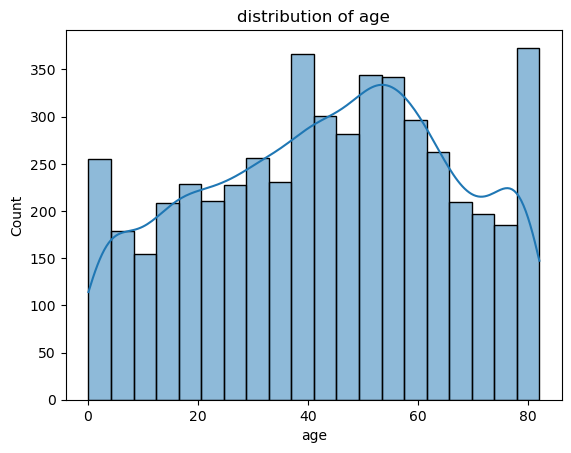

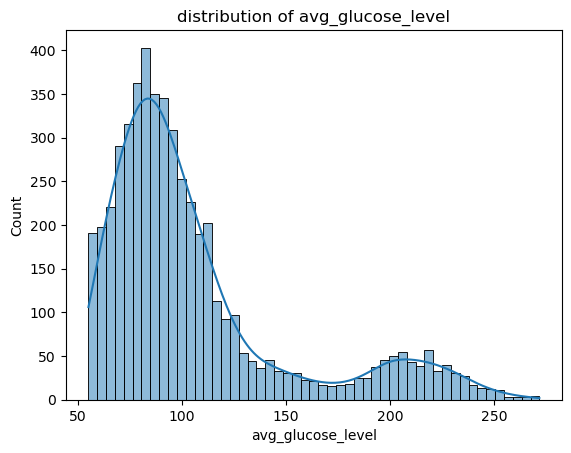

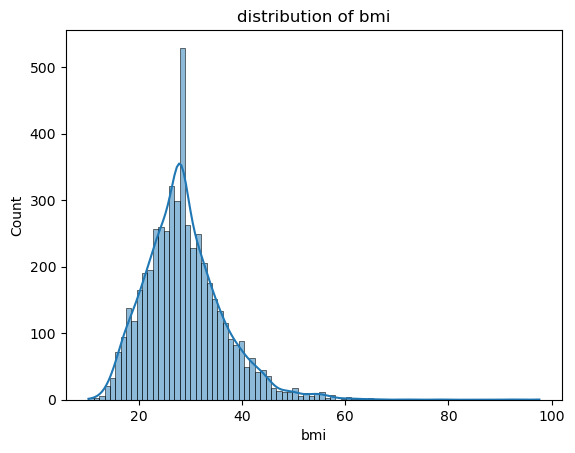

In [8]:
numeric_plt = ['age','avg_glucose_level','bmi']
for col in numeric_plt :
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde =True)
        plt.title(f"distribution of {col}")
        plt.show()
    

In [9]:
traget_col = "stroke"
print("/n traget values")
print(df[traget_col].value_counts())

print("/n traget values normalize ")
print(df[traget_col].value_counts(normalize = True))


/n traget values
stroke
0    4861
1     249
Name: count, dtype: int64
/n traget values normalize 
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


 === gender vs stroke==


stroke,0,1
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,0.000000


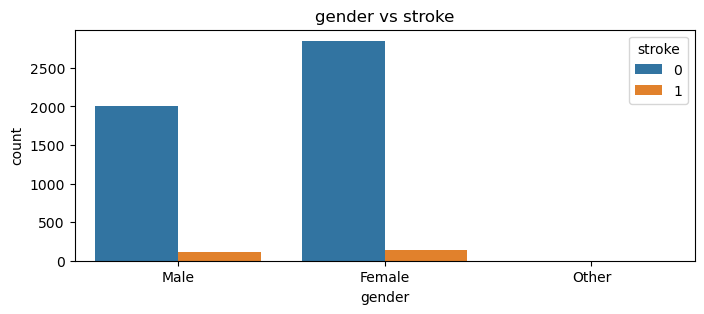

 === ever_married vs stroke==


stroke,0,1
ever_married,,
No,0.983495,0.016505
Yes,0.934387,0.065613


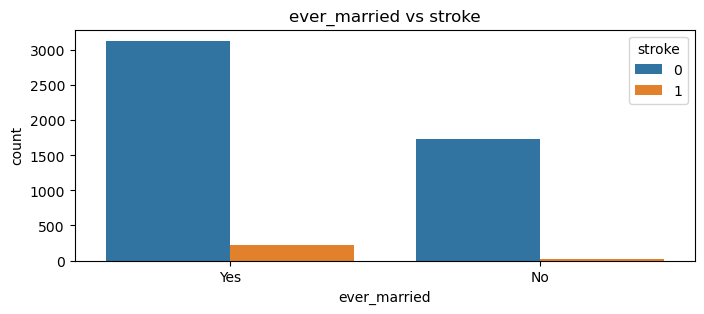

 === work_type vs stroke==


stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949060,0.050940
Self-employed,0.920635,0.079365
children,0.997089,0.002911


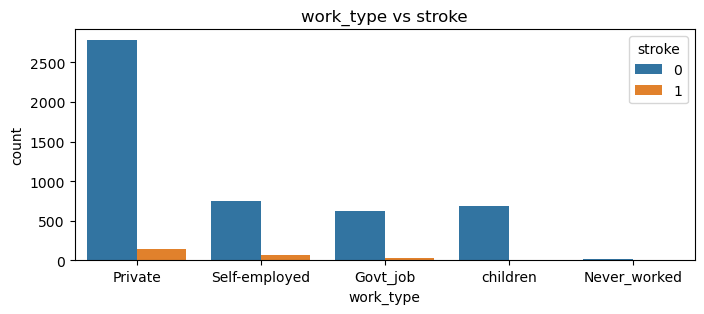

 === Residence_type vs stroke==


stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003


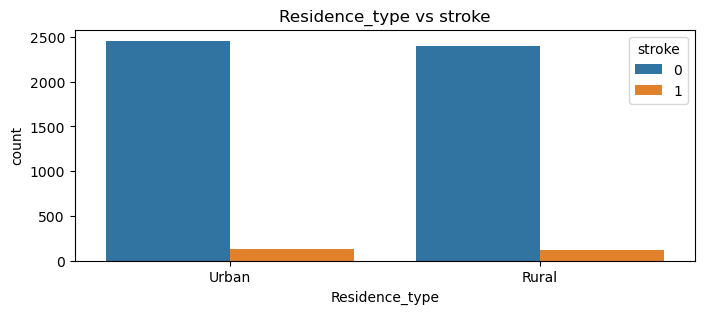

 === smoking_status vs stroke==


stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


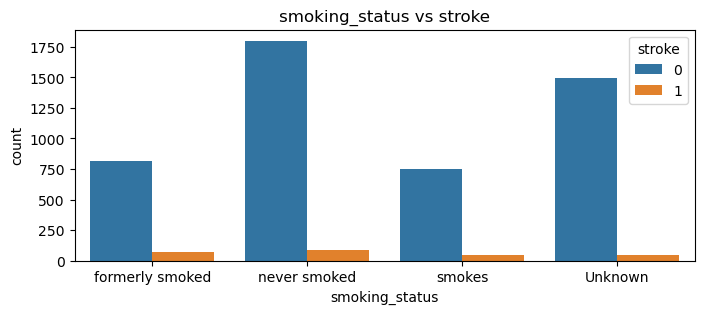

In [10]:
cat_to_check = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df['strokes'] = df['stroke'].astype('str')

for col in cat_to_check:
    if col in df.columns:
        print(f" === {col} vs stroke==")
        display(pd.crosstab(df[col],df[traget_col] , normalize = "index"))
        plt.figure(figsize = (8,3))
        sns.countplot(x = col ,hue = traget_col, data= df)
        plt.title(f"{col} vs stroke")
        plt.show()

In [12]:
numeric_data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.005555,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.005555,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


In [13]:
x.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [14]:
x.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [15]:
df.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
strokes                 2
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le_gender = LabelEncoder()
le_ever_married = LabelEncoder()
le_work_type =  LabelEncoder()
le_Residence_type = LabelEncoder()
le_smoking_status = LabelEncoder()

In [17]:
df['le_gender'] = le_gender.fit_transform(df['gender'])
df['ever_married'] = le_ever_married.fit_transform(df['ever_married'])
df['le_work_type'] = le_work_type.fit_transform(df['work_type'])
df['le_Residence_type'] = le_Residence_type.fit_transform(df['Residence_type'])
df['le_smoking_status'] = le_smoking_status.fit_transform(df['smoking_status'])


In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,le_gender,le_work_type,le_Residence_type,le_smoking_status
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,2,1,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1,0,3,0,2
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,2,0,2
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,0,2,1,3
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,3,0,2


In [19]:
x = df[['le_gender','age','hypertension','heart_disease','ever_married','le_work_type','le_Residence_type','avg_glucose_level','bmi','le_smoking_status']]

In [20]:
x.head()

,le_gender,age,hypertension,heart_disease,ever_married,le_work_type,le_Residence_type,avg_glucose_level,bmi,le_smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2


In [21]:
y = df['stroke']



In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify = y)

In [23]:
lr = LogisticRegression()
kn = KNeighborsClassifier(n_neighbors = 25)
dt = DecisionTreeClassifier(max_depth= 3,min_samples_split = 10)
nv = GaussianNB()
rd = RandomForestClassifier()
sv = SVC()

In [29]:
lr.fit(x_train,y_train)

C:\Users\schan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
lr.score(x_test,y_test)

0.9510763209393346

In [32]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [33]:
kn.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
kn.score(x_test,y_test)

0.9510763209393346

In [35]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [36]:
dt.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
dt.score(x_test,y_test)

0.949119373776908

In [38]:
nv.fit(x_train,y_train)

GaussianNB()

In [39]:
nv.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
nv.score(x_test,y_test)

0.8679060665362035

In [41]:
sv.fit(x_train,y_train)

SVC()

In [42]:
sv.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
sv.score(x_test,y_test)

0.9510763209393346

In [44]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [45]:
gb = GradientBoostingClassifier( n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42)
ad = AdaBoostClassifier(n_estimators=100,
    learning_rate=1.0,
    random_state=42)
xg = XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

lg = LGBMClassifier(boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42)
ca = CatBoostClassifier(iterations=200,
    learning_rate=0.2,
    depth=6,
    loss_function='Logloss',
    random_state=42,
    verbose=0 )

In [46]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
gb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
gb.score(x_test,y_test)

0.9500978473581213

In [49]:
ad.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [50]:
ad.score(x_test,y_test)

0.9510763209393346

In [51]:
xg.fit(x_train,y_train)

C:\Users\schan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:53:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
xg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
xg.score(x_test,y_test)

0.949119373776908

In [54]:
lg.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048679 -> initscore=-2.972603
[LightGBM] [Info] Start training from score -2.972603


LGBMClassifier(random_state=42)

In [55]:
lg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
lg.score(x_test,y_test)

0.9471624266144814

In [57]:
ca.fit(x_train,y_train)

In [58]:
ca.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
ca.score(x_test,y_test)

np.float64(0.9481409001956947)

In [60]:
for col in x_train.columns:
    print(col, type(x_train[col].iloc[0]))


le_gender <class 'numpy.int64'>
age <class 'numpy.float64'>
hypertension <class 'numpy.int64'>
heart_disease <class 'numpy.int64'>
ever_married <class 'numpy.int64'>
le_work_type <class 'numpy.int64'>
le_Residence_type <class 'numpy.int64'>
avg_glucose_level <class 'numpy.float64'>
bmi <class 'numpy.float64'>
le_smoking_status <class 'numpy.int64'>


In [61]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix


In [139]:
x = x.loc[:, ~x.columns.duplicated()]


In [140]:
x.head()

,le_gender,age,hypertension,heart_disease,ever_married,le_work_type,le_Residence_type,avg_glucose_level,bmi,le_smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2


In [94]:
x.dtypes

le_gender            float64
age                  float64
hypertension         float64
heart_disease        float64
ever_married         float64
le_work_type         float64
le_Residence_type    float64
le_Residence_type    float64
avg_glucose_level    float64
bmi                  float64
le_smoking_status    float64
dtype: object

In [ ]:
df.head()

In [89]:
x = x.astype(float)


In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import GridSearchCV
gr = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
gr.fit(x,y)
gr.cv_results_

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(x,y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

In [ ]:
models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10]
        }
    },

    "SVM": {
        "model": SVC(),
        "params": {
            "C": [1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },

    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3,5,7,9]
        }
    },

    "DecisionTree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 5, 10],
            "min_samples_split": [2,5,10]
        }
    },

    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50,100],
            "max_depth": [None, 10]
        }
    },

    "NaiveBayes": {
        "model": GaussianNB(),
        "params": {}
    }
}


In [ ]:
best_models = {}

for model_name, mp in models.items():
    clf = GridSearchCV(
        mp["model"],
        mp["params"],
        cv=5,
        scoring="accuracy"
    )
    clf.fit(x, y)

    best_models[model_name] = {
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    }
